In [5]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from PIL import Image

In [11]:
img1 = cv2.imread('Data\prabhas.jpg')
img2 = cv2.imread('Data\watermark.PNG')

(600, 1100, 3)

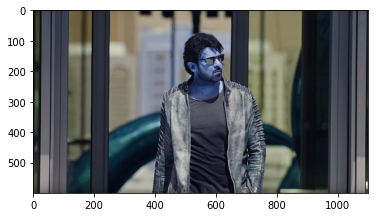

In [12]:
# Show original Image 1
plt.imshow(img1)
img1.shape

(235, 232, 3)

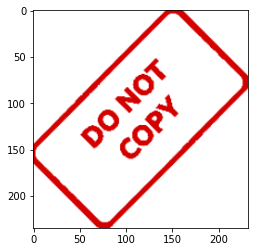

In [13]:
# Show original Image 2
plt.imshow(img2)
img2.shape

In [14]:
# Convert Color from BGR to RGB
img3 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

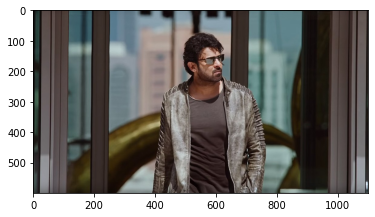

In [15]:
plt.imshow(img3)

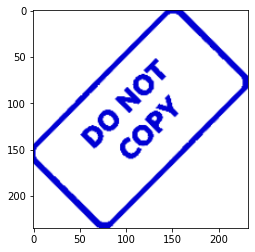

In [16]:
plt.imshow(img4)

In [17]:
img3.shape

(600, 1100, 3)

In [18]:
# Resize Image 1
img1 = cv2.resize(img3, (1200,1200))

In [19]:
# Resize Image 2
img2 = cv2.resize(img2, (1200,1200))

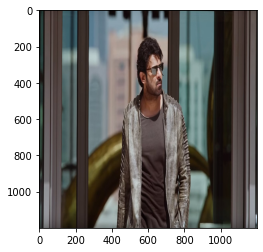

In [20]:
plt.imshow(img1)

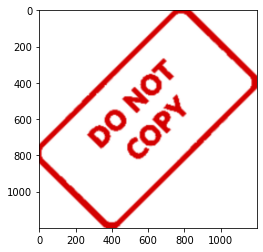

In [21]:
plt.imshow(img2)

# Blending Images

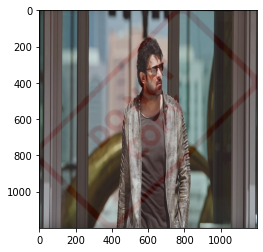

In [23]:
# It can be done only when both images are of same size. So resize unequal images to same size
blended = cv2.addWeighted(img1, 0.9, img2,0.1, 0.9)   # ('image 1', transparancy, 'image 2', transparancy, gamma)
plt.imshow(blended)

# Overlaying Images of Different sizes

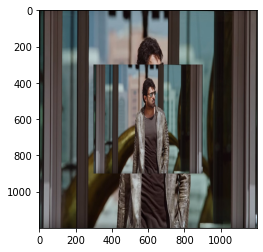

In [24]:
# Create 2 diferent size images
large_img = img1.copy()
small_img = cv2.resize(img1,(600,600))

x_offset= 300
y_offset= 300

large_img[y_offset : y_offset + small_img.shape[0], x_offset : x_offset + small_img.shape[1]] = small_img
plt.imshow(large_img)

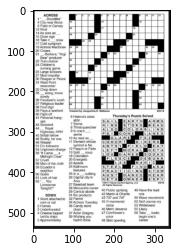

In [25]:
img = cv2.imread('Data\crossword.PNG')
plt.imshow(img, cmap='gray')

In [27]:
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')  

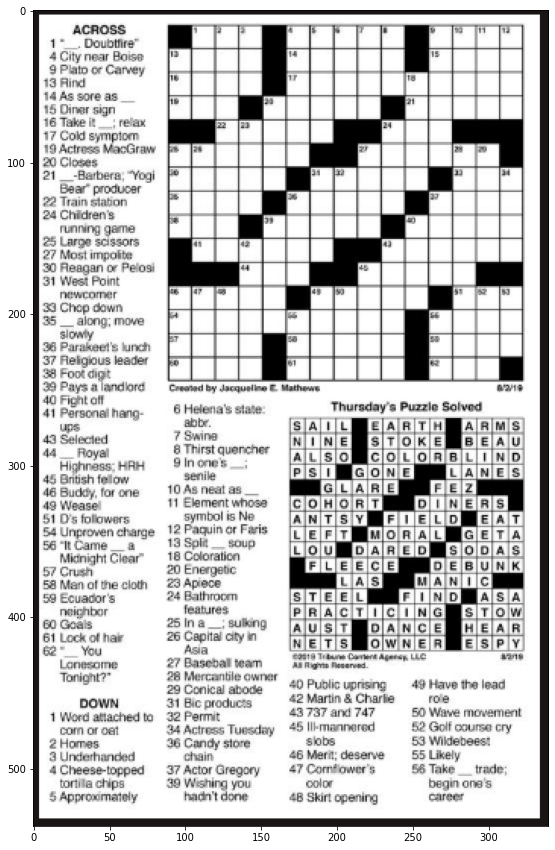

In [28]:
show_pic(img)

In [29]:
img.shape

(538, 340, 3)

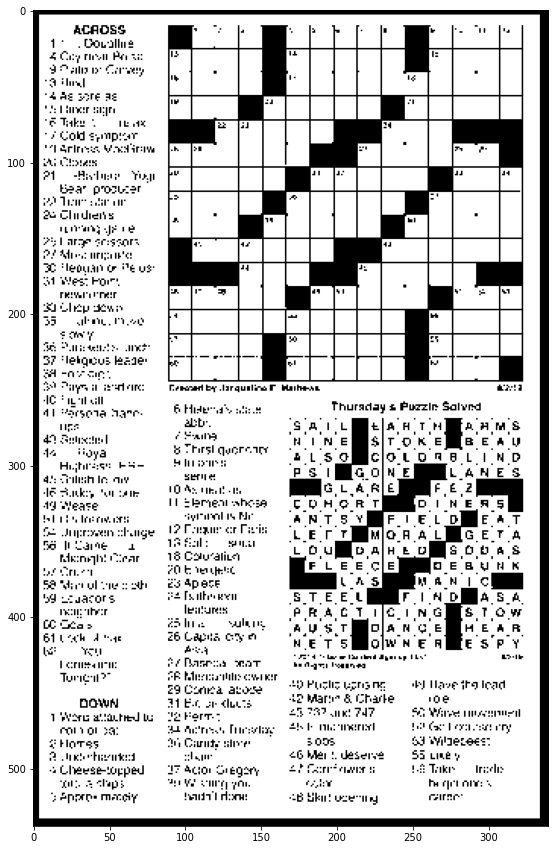

In [30]:
ret, img1 = cv2.threshold(img, 127,255, cv2.THRESH_BINARY)
show_pic(img1)

In [31]:
# Read a new image in Grayscale
img = cv2.imread('Data\sudoku.png', 0)

In [32]:
def show_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

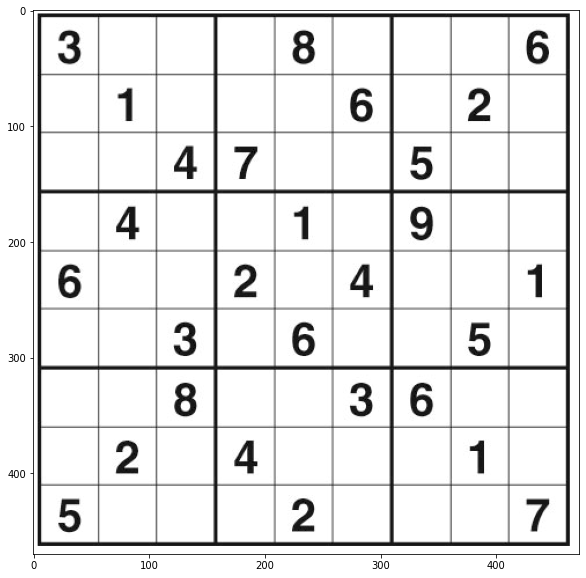

In [33]:
show_img(img)

In [34]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)   # Remove Horizontal Lines
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)   # Remove Vertical Lines
lapacian = cv2.Laplacian(img, cv2.CV_64F)            # Better Clarity in Grayscale

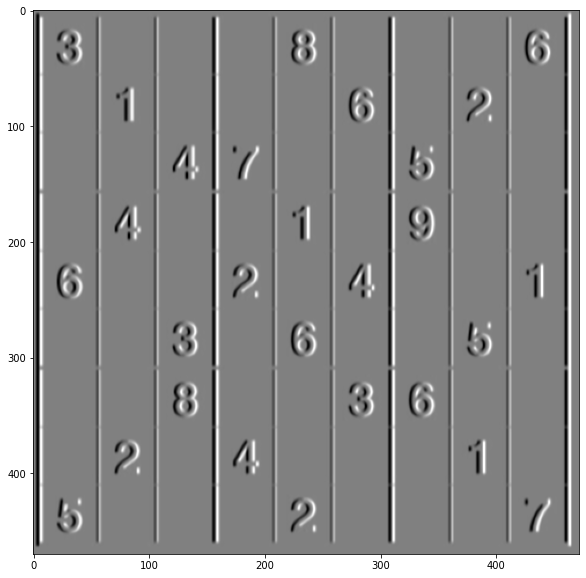

In [35]:
show_img(sobelx)

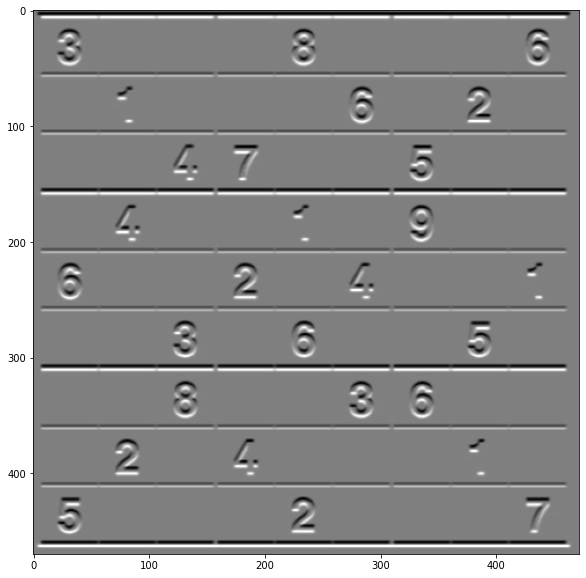

In [36]:
show_img(sobely)

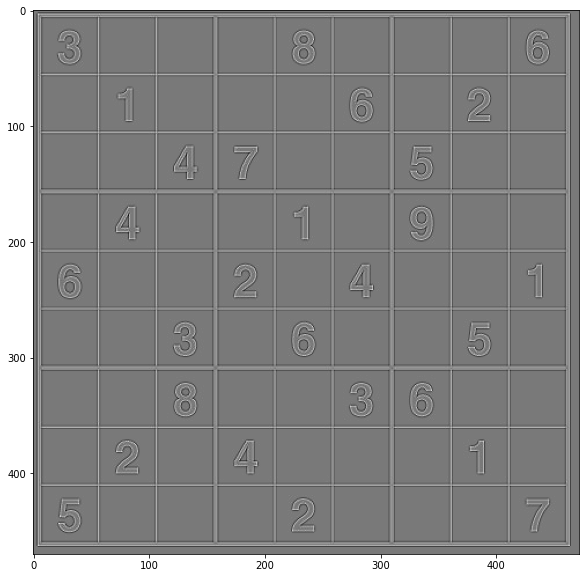

In [37]:
show_img(lapacian)

(470, 472)

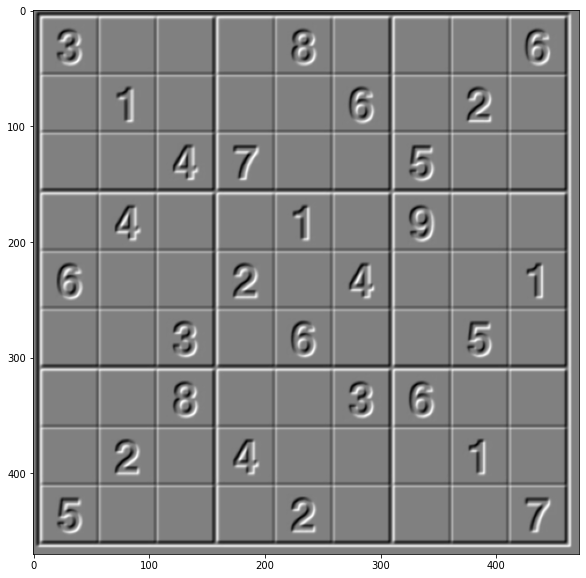

In [38]:
# blend sobelx and sobely
blended = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
show_img(blended)
blended.shape

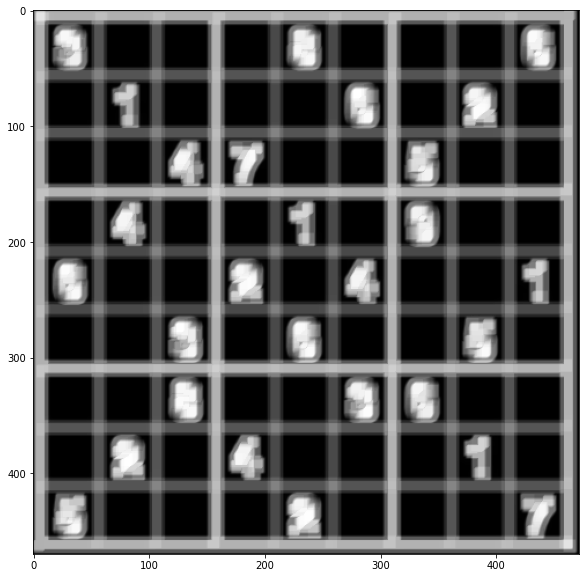

In [39]:
# Morphology
kernel = np.ones((10,10), dtype = None)
gradient = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)
show_img(gradient)

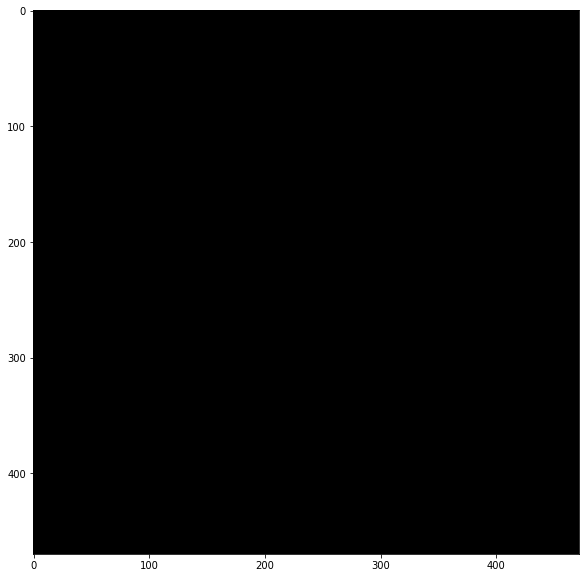

In [40]:
# Modify the Array Size
kernel = np.ones((1,1), dtype =None)
gradient = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)
show_img(gradient)

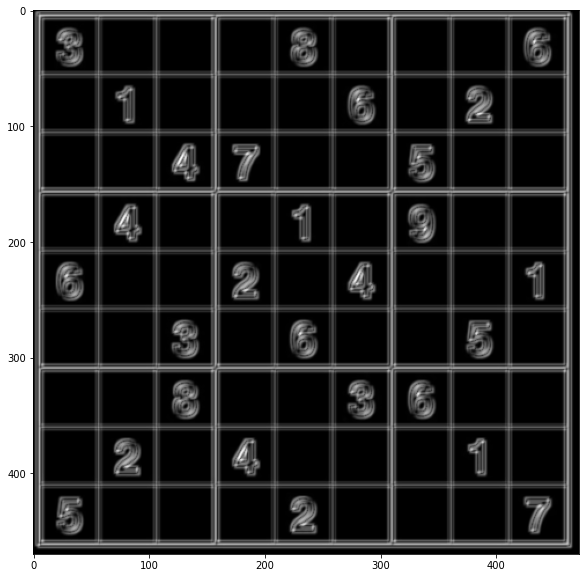

In [41]:
kernel = np.ones((3,3), dtype =None)
gradient = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)
show_img(gradient)

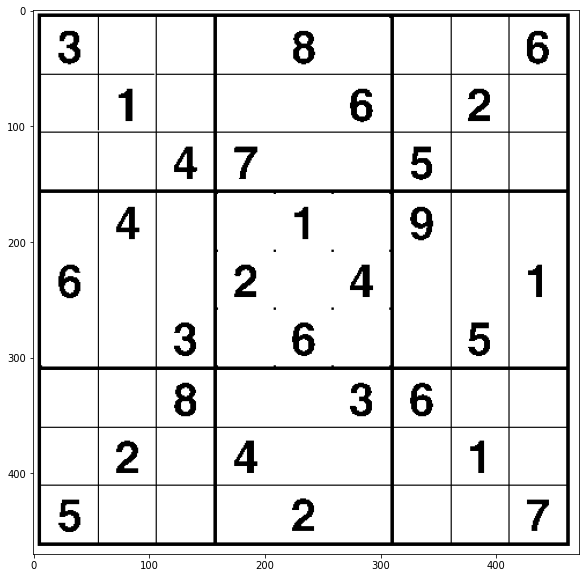

In [42]:
# Invert the colors
ret, th1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
show_img(th1)

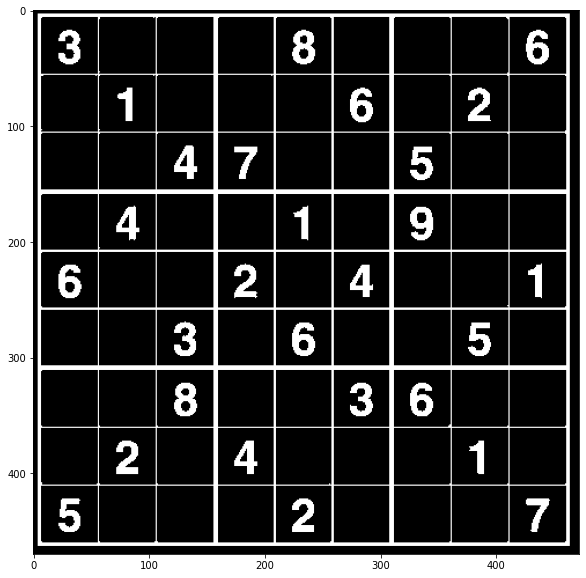

In [43]:
# Increase the line thickness and invert the colors
ret, th2 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
show_img(th2)

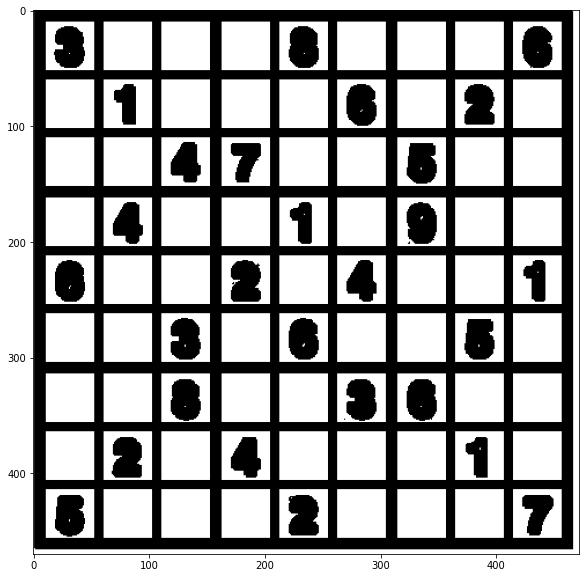

In [44]:
ret, th3 = cv2.threshold(gradient, 200, 255, cv2.THRESH_BINARY_INV)
show_img(th3)

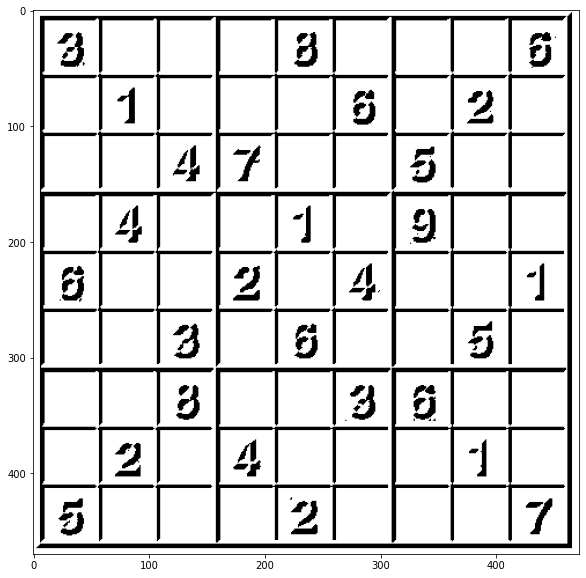

In [45]:
ret, th4 = cv2.threshold(blended, 100, 255, cv2.THRESH_BINARY_INV)
show_img(th4)

# Crop image and save it

In [47]:
img = cv2.imread('Data\Modi.jpg')
flag = False
ix = -1
iy = -1

def crop(event, x, y, flags, params):
    global flag, ix, iy    
    if event == 1: # mouse position
        flag = True
        ix = x
        iy = y
        
    elif event ==4:
        fx = x
        fy = y
        flag = False
        
        cv2.rectangle(img, pt1 = (ix, iy), pt2=(x,y), thickness=1, color=(0,0,0))
        # crop tools
        cropped = img[iy:fy, ix :fx]
        cv2.imwrite("Data/Cropped_Image.png", cropped)      # save the image 
        cv2.imshow("new_window", cropped)
        cv2.waitKey(0)
        
cv2.namedWindow(winname='window')
cv2.setMouseCallback("window", crop)

while True:
    cv2.imshow("window", img)
    if cv2.waitKey(1) & 0xFF == ord('x'):    # Image closes on pressing 'x' button
        break
        
cv2.destroyAllWindows()

# Face Detection

# Single Face Detection

In [49]:
input = cv2.imread('Data\Trump.jpg')
cv2.imshow("Ex President of America", input)
face_classifier = cv2.CascadeClassifier("Data\haarcascade_frontalface_default.xml")
gray = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray, 1.3,5)

if faces is ():
    print("No faces found")
for (x, y, w, h) in faces:
    cv2.rectangle(input, (x,y), (x+w, y+h), (127,0,255),2)
    cv2.imshow("Face Detection", input)
    cv2.waitKey()
cv2.destroyAllWindows()

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\A031828\AppData\Local\Temp/ipykernel_63548/2469633943.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [50]:
import cv2
image = cv2.imread('Data\sample_image.jpeg')
face_classifier = cv2.CascadeClassifier("Data\haarcascade_frontalface_default.xml")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(image, 1.3,5)

if faces is ():
    print("No faces found")
    
# Press Enter for next face detection (1 face at a time)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x,y), (x+w, y+h),(155,100,255),2)
    cv2.imshow("Face Detection", image)
    cv2.waitKey()
cv2.destroyAllWindows()

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\A031828\AppData\Local\Temp/ipykernel_63548/394955759.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


# Multiple Faces Detection

In [51]:
# Image with Multiple Faces
import cv2
image = cv2.imread('Data\Pediatrics-masthead-4.jpg')
image = cv2.resize(image, (1280,720))
face_classifier = cv2.CascadeClassifier("Data\haarcascade_frontalface_default.xml")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(image, 1.3,5)

if faces is ():
    print("No faces found")
    
# Press Enter for next face detection (1 face at a time)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x,y), (x+w, y+h),(155,100,255),2)
    cv2.imshow("Face Detection", image)
    cv2.waitKey()
cv2.destroyAllWindows()

<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\A031828\AppData\Local\Temp/ipykernel_63548/904013318.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


# Eye Detection

# Single Face

In [52]:
face_classifier = cv2.CascadeClassifier("Data\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("Data\haarcascade_eye.xml")
img = cv2.imread('Data\salman-khan.jpg')
# img = cv2.resize(img, (1280,720))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(img, 1.3,5)

if faces is ():
    print("No faces found")

    # Press Enter for next face/eye detection (1 object at a time)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h),(155,100,255),2)
    cv2.imshow("Face Detection", img)
    cv2.waitKey(0)
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh),(255,255,0),2)
        cv2.imshow('img', img)
        cv2.waitKey(0)
        
cv2.destroyAllWindows()

<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\A031828\AppData\Local\Temp/ipykernel_63548/4008996002.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


# Multiple Faces

In [53]:
face_classifier = cv2.CascadeClassifier("Data\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("Data\haarcascade_eye.xml")
img = cv2.imread('Data\Pediatrics-masthead-4.jpg')
img = cv2.resize(img, (1280,720))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(img, 1.3,5)

if faces is ():
    print("No faces found")

# Press Enter for next face/eye detection (1 object at a time)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h),(155,100,255),2)
    cv2.imshow("Face Detection", img)
    cv2.waitKey(0)
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh),(255,255,0),2)
        cv2.imshow('img', img)
        cv2.waitKey(0)
        
cv2.destroyAllWindows()

<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\A031828\AppData\Local\Temp/ipykernel_63548/1183339742.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
